In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM, Bidirectional
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv("/content/drive/MyDrive/BI_Dataset/Trainingdata.csv", delimiter=',')

***VISUALISING TRAIN DATA SET***

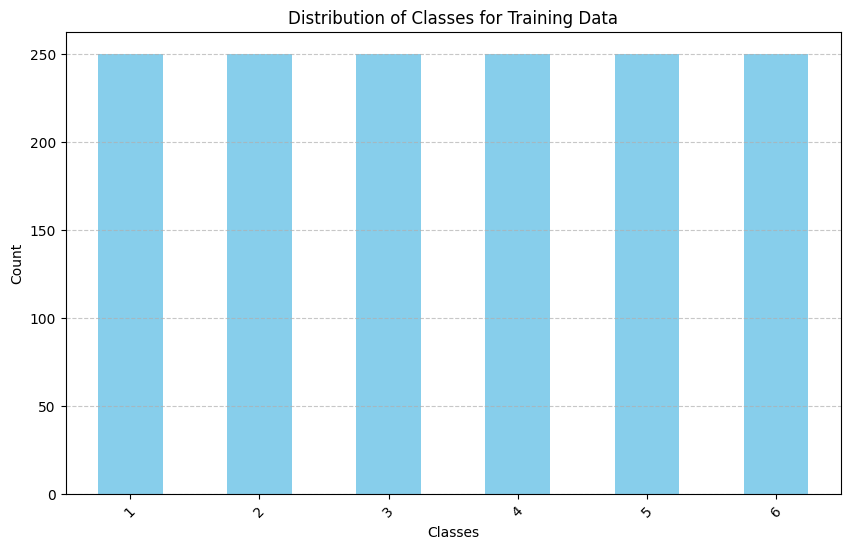

In [ ]:

# Count the occurrences of each class
class_counts_train = df_train['CLASS'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
class_counts_train.plot(kind='bar', color='skyblue')
plt.title('Distribution of Classes for Training Data')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


***ONE HOT ENCODING FUNCTION***

In [ ]:
# One-hot encode the sequences
def one_hot_encode(seq, vocab):
    one_hot_seq = np.zeros((len(seq), len(vocab)))
    for i, s in enumerate(seq):
      if s in vocab:
        one_hot_seq[i, vocab[s]] = 1
      else:
        one_hot_seq[i,:] = 0

    return one_hot_seq


In [ ]:
vocab = {'A': 0, 'C': 1, 'G': 2, 'T': 3}

***PERFORMING ENCODING AND PADDING ON TRAIN DATASET***

In [ ]:

X_train = [one_hot_encode(seq, vocab) for seq in df_train['SEQ']]
X_train = pad_sequences(X_train, padding='post', dtype='float32')

In [ ]:
# Encode labels in training data
labels = pd.get_dummies(df_train['CLASS']).values
y_train = labels


In [ ]:
# Define the model architecture
sequence_length = X_train.shape[1]
print(X_train.shape)
num_classes = y_train.shape[1]

(1500, 30123, 4)


***BUIDLING THE MODEL USING CNN-LSTM***

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(sequence_length, 4)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

***COMPILING THE MODEL***

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

***FITTING THE MODEL TO TRAIN DATASET***

In [ ]:
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.1)

Epoch 1/15
43/43 [==============================] - 73s 2s/step - loss: 0.7463 - accuracy: 0.7259 - val_loss: 0.8426 - val_accuracy: 0.4933
Epoch 2/15
43/43 [==============================] - 71s 2s/step - loss: 0.4994 - accuracy: 0.7622 - val_loss: 0.5840 - val_accuracy: 0.7767
Epoch 3/15
43/43 [==============================] - 72s 2s/step - loss: 0.5954 - accuracy: 0.7600 - val_loss: 1.0426 - val_accuracy: 0.6100
Epoch 4/15
43/43 [==============================] - 72s 2s/step - loss: 0.4756 - accuracy: 0.8200 - val_loss: 0.3869 - val_accuracy: 0.8867
Epoch 5/15
43/43 [==============================] - 72s 2s/step - loss: 0.4631 - accuracy: 0.8007 - val_loss: 0.3429 - val_accuracy: 0.8867
Epoch 6/15
43/43 [==============================] - 74s 2s/step - loss: 0.4109 - accuracy: 0.8259 - val_loss: 0.4235 - val_accuracy: 0.8800
Epoch 7/15
43/43 [==============================] - 72s 2s/step - loss: 0.3729 - accuracy: 0.8400 - val_loss: 0.4251 - val_accuracy: 0.8400
Epoch 8/15
43/43 [==

***SAVING THE MODEL LOCALLY TO DRIVE***

In [ ]:
model.save("/content/drive/MyDrive/BI_SavedModel/BI_Project_CNN_LSTM.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


***LOADING THE SAVED MODEL***

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model("/content/drive/MyDrive/BI_SavedModel/BI_Project_CNN_LSTM.h5")



***VISUALISATION AND EVALUATION OF TEST DATASET'S***

***TEST DATASET-4***

In [ ]:
df_test4=pd.read_csv("/content/drive/MyDrive/BI_Dataset/Testdata-4.csv", delimiter=',')
X_test4 = [one_hot_encode(seq, vocab) for seq in df_test4['SEQ']]
X_test4 = pad_sequences(X_test4, maxlen=sequence_length, padding='post', dtype='float32')
y_test4 = pd.get_dummies(df_test4['Class']).values

# loss4, accuracy4 = loaded_model.evaluate(X_test4, y_test4)
# print("Test Accuracy:", accuracy4)


***VISUALISATION OF TEST DATASET -4***

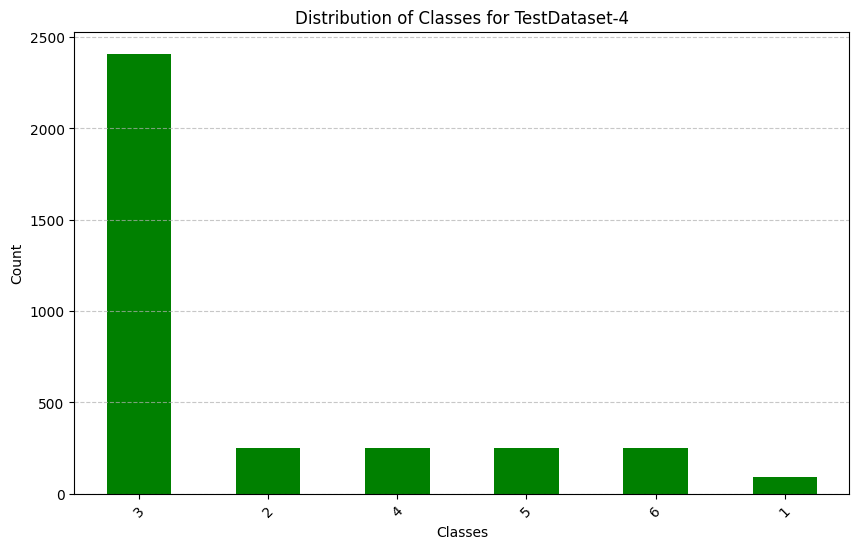

In [ ]:
# Count the occurrences of each class
class_counts_test4 = df_test4['Class'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
class_counts_test4.plot(kind='bar', color='green')
plt.title('Distribution of Classes for TestDataset-4')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***FINDING THE LOSS AND TEST ACCURACY***

In [ ]:
loss4, accuracy4 = loaded_model.evaluate(X_test4, y_test4)
print("Test Accuracy:", accuracy4)

110/110 [==============================] - 83s 734ms/step - loss: 0.6519 - accuracy: 0.9143
Test Accuracy: 0.9142857193946838


***BUILDING CONFUSION MATRIX***

110/110 [==============================] - 86s 746ms/step


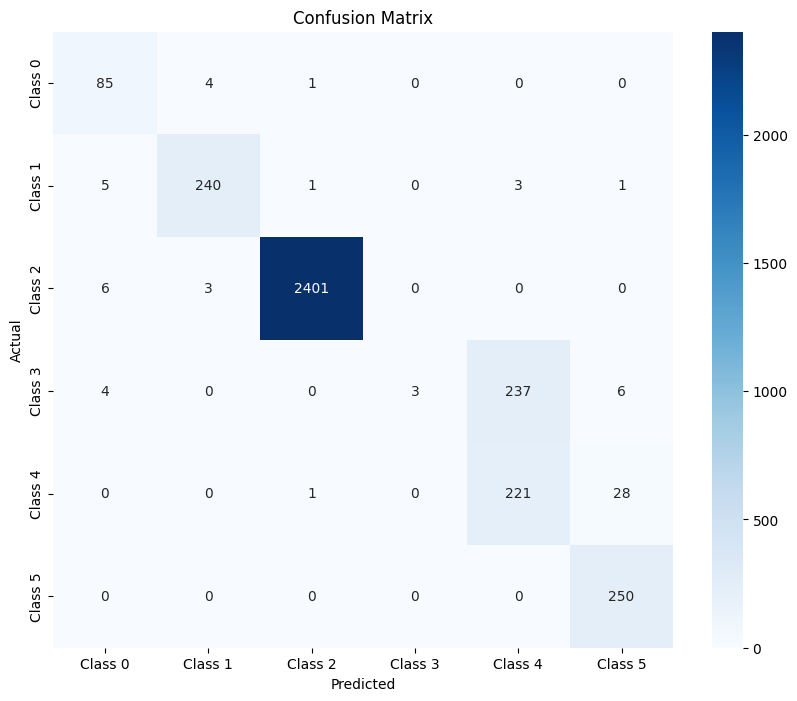

In [ ]:
# Predict classes for test data
y_pred = loaded_model.predict(X_test4)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test4, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***TEST DATASET-5***

In [ ]:
df_test5=pd.read_csv("/content/drive/MyDrive/BI_Dataset/Testdata-5.csv", delimiter=',')
X_test5 = [one_hot_encode(seq, vocab) for seq in df_test5['SEQ']]
X_test5 = pad_sequences(X_test5, maxlen=sequence_length, padding='post', dtype='float32')
y_test5 = pd.get_dummies(df_test5['Class']).values

# loss5, accuracy5 = loaded_model.evaluate(X_test5, y_test5)
# print("Test Accuracy:", accuracy5)

***VISUALISATION OF TEST DATASET-5***

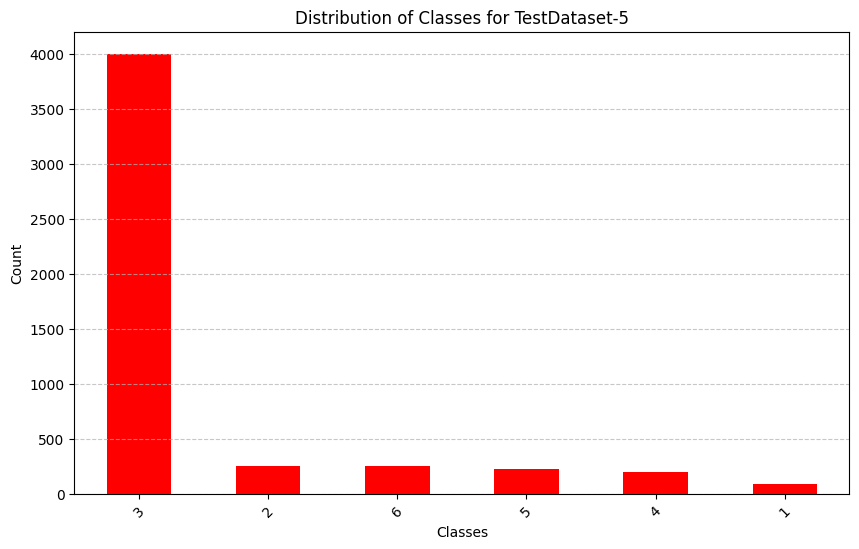

In [ ]:
# Count the occurrences of each class
class_counts_test5 = df_test5['Class'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
class_counts_test5.plot(kind='bar', color='red')
plt.title('Distribution of Classes for TestDataset-5')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***FINDING LOSS AND TEST ACCURACY***

In [ ]:

loss5, accuracy5 = loaded_model.evaluate(X_test5, y_test5)
print("Test Accuracy:", accuracy5)

157/157 [==============================] - 125s 777ms/step - loss: 0.2916 - accuracy: 0.9537
Test Accuracy: 0.953692615032196


***BUILDING CONFUSION MATRIX***

157/157 [==============================] - 146s 912ms/step


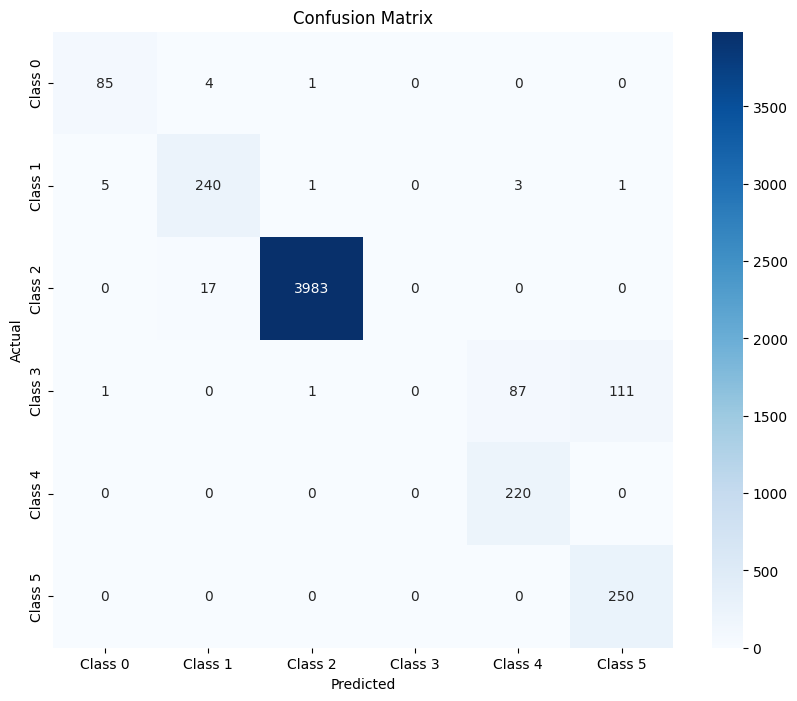

In [ ]:
# Predict classes for test data
y_pred5 = loaded_model.predict(X_test5)
y_pred5_classes = np.argmax(y_pred5, axis=1)
y_true5_classes = np.argmax(y_test5, axis=1)

# Generate confusion matrix
conf_matrix5 = confusion_matrix(y_true5_classes, y_pred5_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix5, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***TEST DATASET-1***

In [ ]:
df_test1=pd.read_csv("/content/drive/MyDrive/BI_Dataset/Testdata-1.csv", delimiter=',')
X_test1 = [one_hot_encode(seq, vocab) for seq in df_test1['SEQ']]
X_test1 = pad_sequences(X_test1, maxlen=sequence_length, padding='post', dtype='float32')
y_test1 = pd.get_dummies(df_test1['Class']).values

# loss1, accuracy1 = loaded_model.evaluate(X_test1, y_test1)
# print("Test Accuracy:", accuracy1)

***VISUALISING TEST DATASET-1***

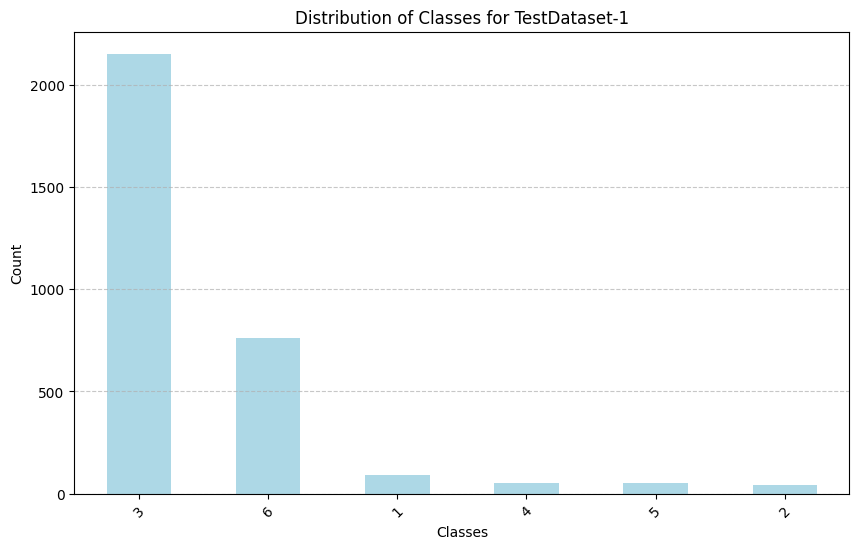

In [ ]:
D# Count the occurrences of each class
class_counts_test1 = df_test1['Class'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
class_counts_test1.plot(kind='bar', color='lightblue')
plt.title('Distribution of Classes for TestDataset-1')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***FINDING THE TEST ACCURACY AND LOSS***

In [ ]:
loss1, accuracy1 = loaded_model.evaluate(X_test1, y_test1)
print("Test Accuracy:", accuracy1)

99/99 [==============================] - 74s 741ms/step - loss: 0.2809 - accuracy: 0.9310
Test Accuracy: 0.9309576749801636


***BUILDING CONFUSION MATRIX***

99/99 [==============================] - 74s 744ms/step


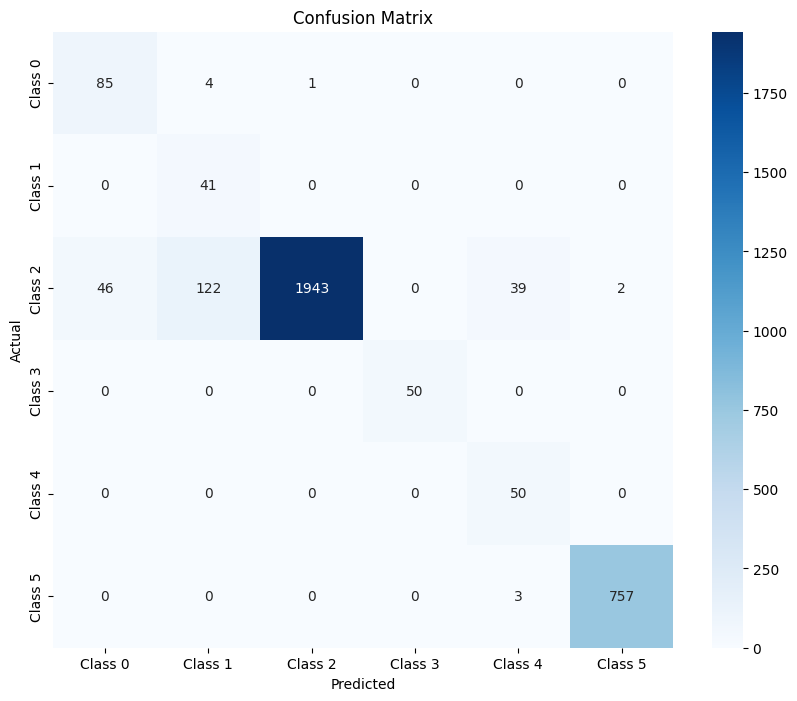

In [ ]:
# Predict classes for test data
y_pred1 = loaded_model.predict(X_test1)
y_pred1_classes = np.argmax(y_pred1, axis=1)
y_true1_classes = np.argmax(y_test1, axis=1)

# Generate confusion matrix
conf_matrix1 = confusion_matrix(y_true1_classes, y_pred1_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***TEST DATASET-2***

In [ ]:
df_test2=pd.read_csv("/content/drive/MyDrive/BI_Dataset/Testdata-2.csv", delimiter=',')
X_test2 = [one_hot_encode(seq, vocab) for seq in df_test2['SEQ']]
X_test2 = pad_sequences(X_test2, maxlen=sequence_length, padding='post', dtype='float32')
y_test2 = pd.get_dummies(df_test2['CLASS']).values

# loss2, accuracy2 = loaded_model.evaluate(X_test2, y_test2)
# print("Test Accuracy:", accuracy2)

***VISUALISING TEST DATASET-2***

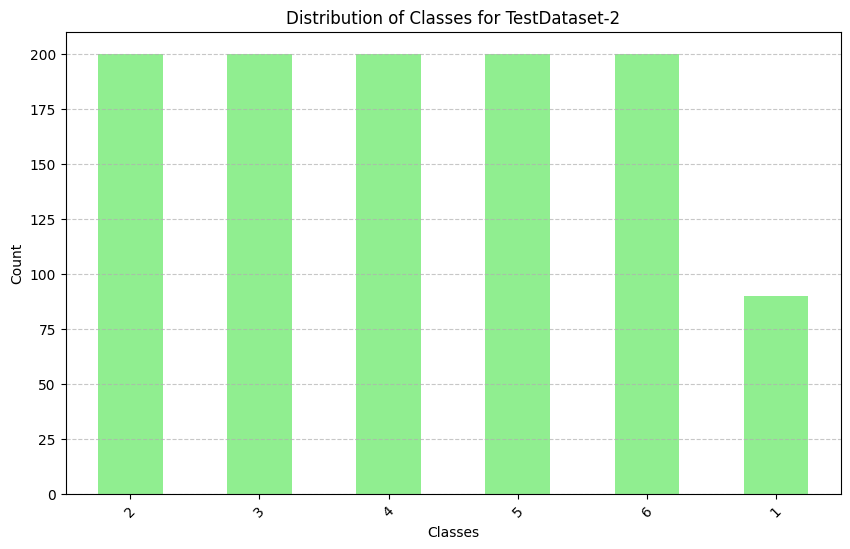

In [ ]:
# Count the occurrences of each class
class_counts_test2 = df_test2['CLASS'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
class_counts_test2.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Classes for TestDataset-2')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***FINDING TEST ACCURACY AND LOSS***

In [ ]:
loss2, accuracy2 = loaded_model.evaluate(X_test2, y_test2)
print("Test Accuracy:", accuracy2)

35/35 [==============================] - 26s 742ms/step - loss: 1.2043 - accuracy: 0.8000
Test Accuracy: 0.800000011920929


***BUILDING THE CONFUSION MATRIX***

35/35 [==============================] - 26s 736ms/step


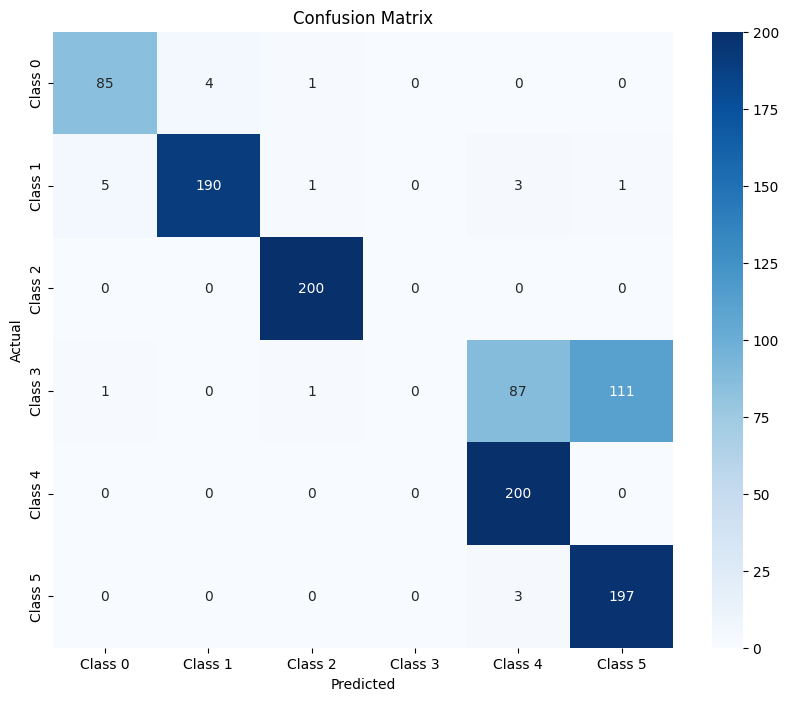

In [ ]:
# Predict classes for test data
y_pred2 = loaded_model.predict(X_test2)
y_pred2_classes = np.argmax(y_pred2, axis=1)
y_true2_classes = np.argmax(y_test2, axis=1)

# Generate confusion matrix
conf_matrix2 = confusion_matrix(y_true2_classes, y_pred2_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

***TEST DATASET-3***

In [ ]:
df_test3=pd.read_csv("/content/drive/MyDrive/BI_Dataset/Testdata-3.csv", delimiter=',')
X_test3 = [one_hot_encode(seq, vocab) for seq in df_test3['SEQ']]
X_test3 = pad_sequences(X_test3, maxlen=sequence_length, padding='post', dtype='float32')
y_test3 = pd.get_dummies(df_test3['Class']).values

# loss3, accuracy3 = loaded_model.evaluate(X_test3, y_test3)
# print("Test Accuracy:", accuracy3)

***VISUALISING TEST DATASET-3***

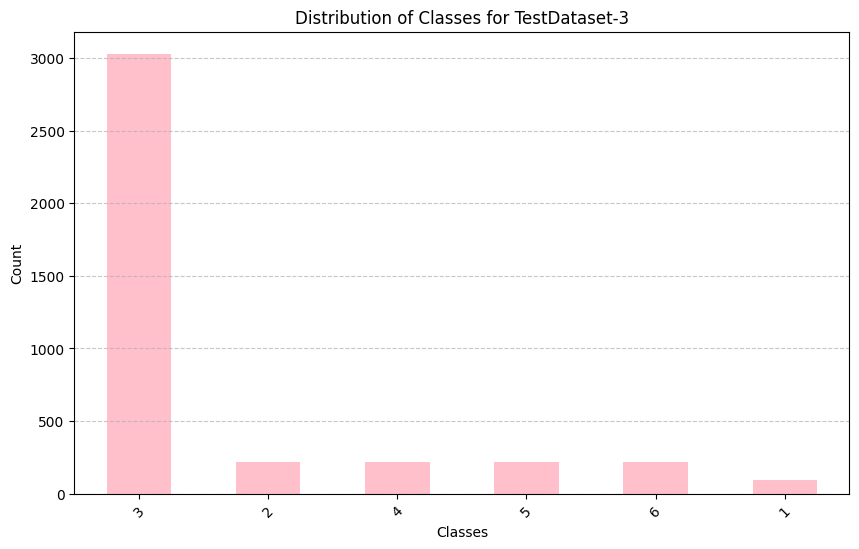

In [ ]:
# Count the occurrences of each class
class_counts_test3 = df_test3['Class'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
class_counts_test3.plot(kind='bar', color='pink')
plt.title('Distribution of Classes for TestDataset-3')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

***FINDING THE LOSS AND TEST ACCURACY***

In [ ]:
loss3, accuracy3 = loaded_model.evaluate(X_test3, y_test3)
print("Test Accuracy:", accuracy3)

125/125 [==============================] - 96s 743ms/step - loss: 0.6062 - accuracy: 0.9050
Test Accuracy: 0.9049999713897705


***BUILDING THE CONFUSION MATRIX***

125/125 [==============================] - 99s 765ms/step


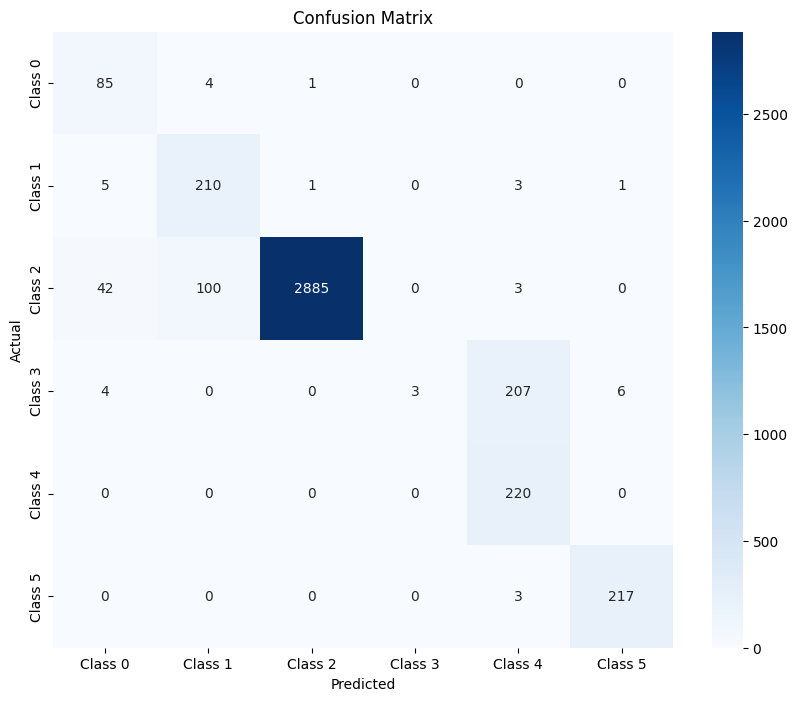

In [ ]:
# Predict classes for test data
y_pred3 = loaded_model.predict(X_test3)
y_pred3_classes = np.argmax(y_pred3, axis=1)
y_true3_classes = np.argmax(y_test3, axis=1)

# Generate confusion matrix
conf_matrix3 = confusion_matrix(y_true3_classes, y_pred3_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()